<a href="https://colab.research.google.com/github/Mizoroki-Heck/LearnMLWorkshop/blob/main/property_valuation/property_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data = pd.read_excel('/content/sample_data/Real estate valuation data set.xlsx')
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


<Axes: >

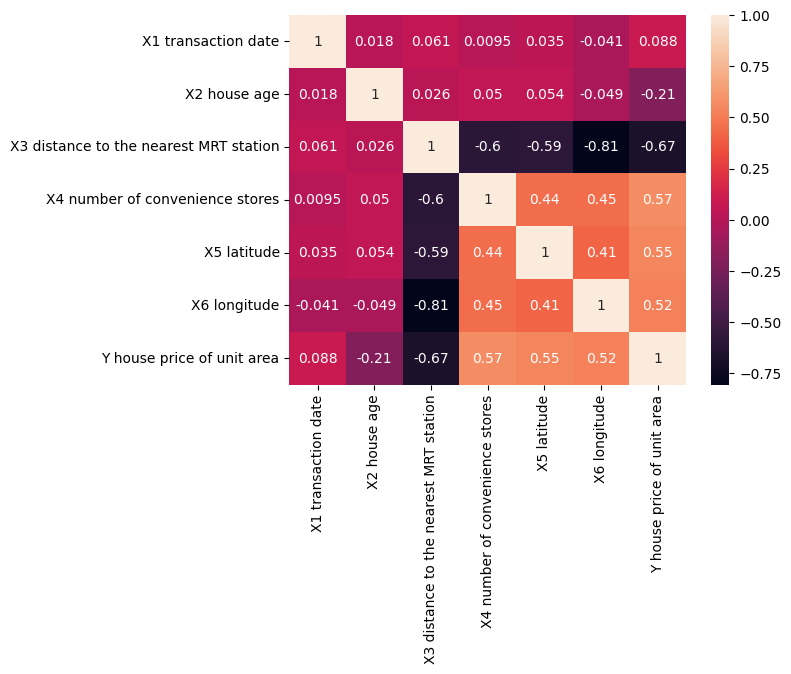

In [ ]:
sns.heatmap(data.corr(), annot=True)

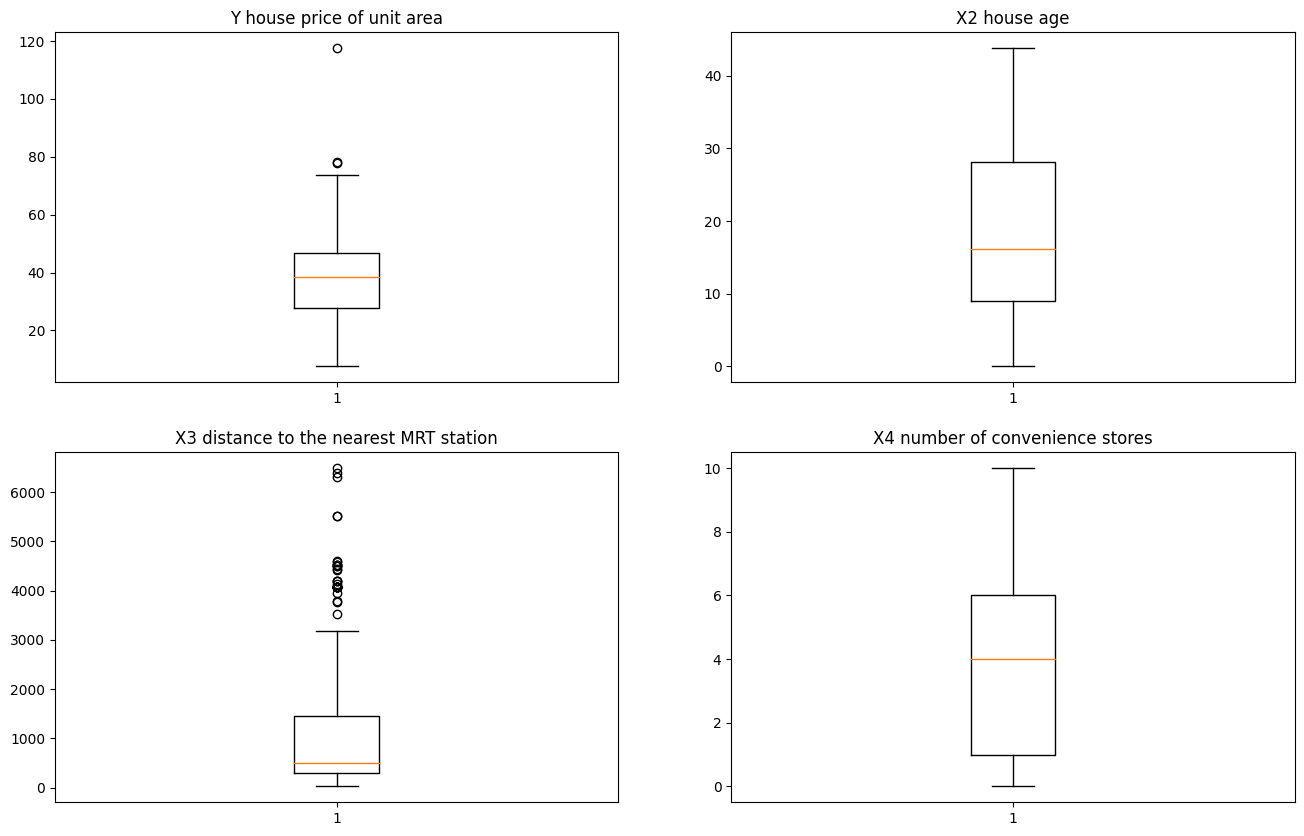

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
plt.boxplot(data['Y house price of unit area'])
plt.title('Y house price of unit area')

plt.subplot(2, 2, 2)
plt.boxplot(data['X2 house age'])
plt.title('X2 house age')

plt.subplot(2, 2, 3)
plt.boxplot(data['X3 distance to the nearest MRT station'])
plt.title('X3 distance to the nearest MRT station')

plt.subplot(2, 2, 4)
plt.boxplot(data['X4 number of convenience stores'])
plt.title('X4 number of convenience stores')

plt.show()


Есть 1 выброс в целевой переменной, который сильно отклоняется, равный примерно 117
Думаю его стоит удалить
Что касаемо других, не думаю, что в расстоянии до метро, могут быть такие выбросы, могут быть дома, которые далеко находятся от метро.

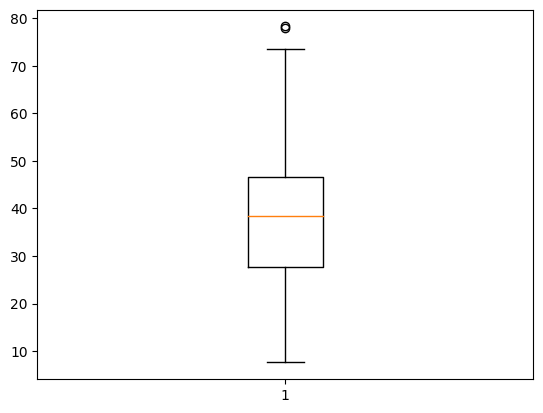

In [ ]:
data.drop(labels=[270], axis=0, inplace = True)

plt.boxplot(data['Y house price of unit area'])
plt.show()

Попробуем обучить две модели, линейной регрессии и решающие деревья, и посмотрим какая лучше

##1)Линейная регрессия

Думаю стоит привести данные к одному масштабу

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Стандартизируем
scaller = StandardScaler()
X_train_scalled = scaller.fit_transform(X_train)
X_test_scalled = scaller.transform(X_test)

#обучаем модель
lin_reg = LinearRegression()
lin_reg.fit(X_train_scalled, y_train)
predict = lin_reg.predict(X_test_scalled)

# Оценка модели
MAE = mean_absolute_error(y_test, predict)
MSE = mean_squared_error(y_test, predict)
RMSE = (MSE)**0.5

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 5.826509966767714
MSE: 70.9609980177804
RMSE: 8.423835113401758


#2)Решающие деревья

In [ ]:
from sklearn import ensemble

In [ ]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
predict = random_forest_model.predict(X_test)

# Оценка модели
MAE = mean_absolute_error(y_test, predict)
MSE = mean_squared_error(y_test, predict)
RMSE = (MSE)**0.5

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 4.796623092369476
MSE: 50.92097137606759
RMSE: 7.135893172971944


Видим что простая модель деревьев справляется лучше, попробуем улучшить результат подобрав гиперпараметры GridCV

In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest_model = ensemble.RandomForestRegressor()
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error'],
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 12150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Лучшие параметры: {'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [ ]:
random_forest_model = ensemble.RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4
)
random_forest_model.fit(X_train, y_train)
predict = random_forest_model.predict(X_test)

# Оценка модели
MAE = mean_absolute_error(y_test, predict)
MSE = mean_squared_error(y_test, predict)
RMSE = (MSE)**0.5

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 4.681539562111247
MSE: 49.12496293357068
RMSE: 7.008920240206096


Добились улучшения модели

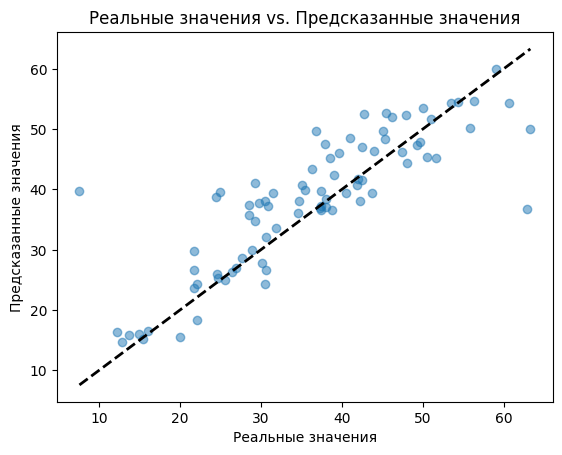

In [ ]:
plt.scatter(y_test, predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Добавляем диагональную линию
plt.title('Реальные значения vs. Предсказанные значения')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.show()